<a href="https://colab.research.google.com/github/meisamgh/Alpha-101-GTJA-191/blob/master/Regression_Time_bar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install twelvedata
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load Data

In [ ]:
###Timebar nasdaq
#!gdown --id 1mX13M51X2U1y7b9IQ1FEQqkTQ1IR3q0i

#Volumebar NASDAQ
##https://drive.google.com/file/d/1JfanOU5amyYzpoipDpwOWZPdTxaUIZb6/view?usp=sharing

#!gdown --id 1JfanOU5amyYzpoipDpwOWZPdTxaUIZb6


### Bitcoin
!gdown --id 1BGF1wKbBG8PCPP7RnXQ2TnNgJMSgVu77
#https://drive.google.com/file/d/1BGF1wKbBG8PCPP7RnXQ2TnNgJMSgVu77/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1BGF1wKbBG8PCPP7RnXQ2TnNgJMSgVu77 



#Install and Import Packeges

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2022-05-31 05:43:39--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-31 05:43:39--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-31 05:43:40--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

In [ ]:
!pip install xgboost
#!pip install lightgbm
#!pip install pandas_datareader
#!pip install yfinance
!pip install pykalman
!pip install ta
!pip install hmmlearn
!pip install arch
!pip install fuzzy-c-means
#!pip install alphalens
#!pip install mlfinlab
#!pip install shap
!pip install pyfolio
!pip install backtrader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import talib
#import yfinance as yf
from pykalman import KalmanFilter
from arch.univariate import  arch_model 
from hmmlearn.hmm import GaussianHMM
from fcmeans import FCM
from sklearn.cluster import KMeans


#Data Cleansing

In [ ]:
#tickers = ['AAPL']#,'GOGO','TSLA','NKE','SPY']
#data = web.DataReader(tickers , 'yahoo', start='2018/01/01', end='2019/12/31')
#data.columns = ['Adj close' , 'Close' , 'High' , 'Low' , 'Open' , 'Volume']
#data = yf.download(tickers="MSFT" ,period="2y",interval="60m")
# data = pd.read_csv('/content/Binance_BTCUSDT_1h_new.csv')

### Timebar
#cols = ['Date','Time','Open','High','Low','Close','Volume',
#        'Num_Trades','OHLC_Avg','HLC_Avg','HL_Avg','Bid_Volume','Ask_Volume']
#data.columns = cols

### VolumeBar
#cols = ['Date','Time','Open','High','Low','Close','Volume','Num_Trades','OHLC_Avg','HLC_Avg','HL_Avg','Bid_Volume','Ask_Volume' ,
#        'VWAP', 'Top_Band_3', 'Bottom_Band_3', 'Top_Band_4',
#       ' Bottom_Band_4']
#data.columns = cols

#data.loc[:, "DateTime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
#data.set_index('DateTime', inplace=True , drop = True)
#data.sort_index(inplace=True)

#data.drop(['Date' , 'Time'] , axis = 1 , inplace = True)


#### Bit-Coin
from datetime import datetime

# cols= ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume',
#        'Quot_asset_volume', 'Trade_count', 'Buy_volume',
#        'Quote_asset_buy_volume']

# data.columns = cols

# time = data.timestamp/1000
# data.index = time.apply(lambda x:datetime.fromtimestamp(x))

# data.drop('timestamp', 1 , inplace = True)
# data.index.names = ['DateTime']
import yfinance as yf 
tickers = ['AAPL' ]#,'GOGO','TSLA','NKE','SPY']
data = yf.download('AAPL'  ,period='2y', interval = '1d')
#data.columns = ['Adj close' , 'Close' , 'High' , 'Low' , 'Open' , 'Volume']

### General
data['Returns']= data.Close.pct_change()*100

columns = data.columns

for i in columns:
  data[f'{i.lower()}'] = data[f'{i}'].shift(1)


data['squre_Return']= data['returns']**2
data.dropna(0, inplace= True)

close = data.close
high = data.high
low = data.low
open = data.open
volume = data.volume
#adj_close = data['adj close']
returns = data['returns']
alpha = pd.DataFrame(index=data.index)

[*********************100%***********************]  1 of 1 completed


#Technical Functions

All functions are availabel [here](https://mrjbq7.github.io/ta-lib/)

##Momentum

In [ ]:
from talib import ( ADX , ADXR , APO  , AROON , AROONOSC , BOP, CCI , CMO , DX , MACDFIX , MFI , MINUS_DI,MACD,
                   MINUS_DM , MOM , PLUS_DI , PLUS_DM , PPO , ROC , ROCP ,  ROCR , ROCR100 , RSI  , MACDEXT,MACDFIX,
                   STOCH , STOCHF , STOCHRSI, TRIX , ULTOSC , WILLR)

momentum = pd.DataFrame(index = data.index)

momentum['ADX'] = ADX(high, low, close, timeperiod=14)
momentum['ADXR'] = ADXR(high, low, close, timeperiod=14)
momentum['APO'] = APO(close, fastperiod=12, slowperiod=26, matype=0)
momentum['aroondown'], momentum['aroonup'] = AROON(high, low, timeperiod=14)
momentum['AROONOSC'] = AROONOSC(high, low, timeperiod=14)
momentum['BOP'] = BOP(open, high, low, close)
momentum['CCI'] = CCI(high, low, close, timeperiod=14)
momentum['CMO'] = CMO(close, timeperiod=14)
momentum['DX'] = DX(high, low, close, timeperiod=14)
momentum['macd_EXT'], momentum['macdsignal_EXT'], momentum['macdhist_EXT'] = MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
momentum['macd_FIX'], momentum['macdsignal_FIX'], momentum['macdhist_FIX'] = MACDFIX(close, signalperiod=9)
#momentum['MFI'] = MFI(high, low, close, volume, timeperiod=14)
momentum['MINUS_DI'] = MINUS_DI(high, low, close, timeperiod=14)
momentum['MINUS_DM'] = MINUS_DM(high, low, timeperiod=14)
momentum['MOM'] = MOM(close, timeperiod=10)
momentum['PLUS_DI'] = PLUS_DI(high, low, close, timeperiod=14)
momentum['PLUS_DM'] = PLUS_DM(high, low, timeperiod=14)
momentum['PPO'] = PPO(close, fastperiod=12, slowperiod=26, matype=0)
momentum['ROC'] = ROC(close, timeperiod=10)
momentum['ROCP'] = ROCP(close, timeperiod=10)
momentum['ROCR'] = ROCR(close, timeperiod=10)
momentum['ROCR100'] = ROCR100(close, timeperiod=10)
momentum['RSI'] = RSI(close, timeperiod=14)
momentum['slowk'], momentum['slowd'] = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
momentum['fastk_F'], momentum['fastd_F'] = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
momentum['fastk_RSI'], momentum['fastd_RSI'] = STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
momentum['TRIX'] = TRIX(close, timeperiod=30)
momentum['ULTOSC'] = ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
momentum['WILLR'] = WILLR(high, low, close, timeperiod=14)

import ta
momentum['awesome_oscillator']=ta.momentum.awesome_oscillator(high, low, window1=5, window2=34, fillna=False)
momentum['ppo_signal']=ta.momentum.ppo_signal(close, window_slow=26, window_fast=12, window_sign=9, fillna=False)
momentum['pvo']=ta.momentum.pvo(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False) 
momentum['pvo_hist']=ta.momentum.pvo_hist(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False) 
momentum['pvo_signal']=ta.momentum.pvo_signal(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False)
momentum['stoch_signal']=ta.momentum.stoch_signal(high, low, close, window=14, smooth_window=3, fillna=False) 
momentum['stochrsi_d']=ta.momentum.stochrsi_d(close, window = 14, smooth1 = 3, smooth2 = 3, fillna= False)
momentum['stochrsi_k']=ta.momentum.stochrsi_k(close, window = 14, smooth1 = 3, smooth2 = 3, fillna= False)
momentum['tsi']=ta.momentum.tsi(close, window_slow=25, window_fast=13, fillna=False)
momentum['ultimate_oscillator']=ta.momentum.ultimate_oscillator(high, low, close, window1=7, window2=14, window3=28, weight1=4.0, weight2=2.0, weight3=1.0, fillna=False)

alpha = pd.concat([alpha , momentum] , 1)

##Overlap Studies


In [ ]:
from talib import (RSI, BBANDS, MACD , ADX , DEMA , EMA , HT_TRENDLINE , KAMA , MA , MAMA , 
                   MAVP, MIDPOINT , MIDPRICE , SAR , SAREXT , SMA , T3, TEMA , TRIMA , WMA)

overlap = pd.DataFrame(index = data.index)

overlap['up_band'], overlap['mid_band'], overlap['low_band'] = BBANDS(close , timeperiod=20 ,nbdevup=2, nbdevdn=2, matype=0)
#overlap['up'], overlap['mid'], overlap['low_'] = BBANDS(adj_close , timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
overlap['macd'], overlap['macdsignal'], overlap['macdhist'] = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
overlap['DEMA'] = DEMA(close, timeperiod=30)
overlap['EMA'] = EMA(close, timeperiod=30)
overlap['HT_TRENDLINE'] = HT_TRENDLINE(close)
overlap['KAMA'] = KAMA(close, timeperiod=30)
overlap['MA'] = MA(close, timeperiod=30, matype=0)
overlap['mama'], overlap['fama'] = MAMA(close)
#overlap['MAVP'] = MAVP(close, periods= 3, minperiod=2, maxperiod=30, matype=0)
overlap['MIDPOINT'] = MIDPOINT(close, timeperiod=14)
overlap['MIDPRICE'] = MIDPRICE(high, low, timeperiod=14)
overlap['SAR'] = SAR(high, low, acceleration=0.02, maximum=0.2)
#overlap['SAREXT'] = SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0.06, accelerationmaxlong=0.1, accelerationinitshort=1, accelerationshort=0.01, accelerationmaxshort=0.02)
overlap['SMA'] = SMA(close, timeperiod=30)
overlap['T3'] = T3(close, timeperiod=5, vfactor=0)
overlap['TEMA'] = TEMA(close, timeperiod=30)
overlap['TRIMA'] = TRIMA(close, timeperiod=30)
overlap['WMA'] = WMA(close, timeperiod=30)

alpha = pd.concat([overlap , alpha] , 1)

##Price Transform Functions

In [ ]:
from talib import AVGPRICE, MEDPRICE  , TYPPRICE , WCLPRICE

price_tranc = pd.DataFrame(index = data.index)

price_tranc['AVGPRICE'] = AVGPRICE(open, high, low, close)
price_tranc['MEDPRICE'] = MEDPRICE(high, low)
price_tranc['TYPPRICE'] = TYPPRICE(high, low, close)
price_tranc['WCLPRICE'] = WCLPRICE(high, low, close)

alpha = pd.concat([price_tranc , alpha] , 1)

##pattern detection


In [ ]:
import talib as talib

pattern = pd.DataFrame(index = data.index)

pattern['CDL2CROWS'] = talib.CDL2CROWS(open, high, low, close)
pattern['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(open, high, low, close)
pattern['CDL3INSIDE'] = talib.CDL3INSIDE(open, high, low, close)
pattern['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(open, high, low, close)
pattern['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(open, high, low, close)
#pattern['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(open, high, low, close)
pattern['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(open, high, low, close)
#pattern['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(open, high, low, close, penetration=0)
pattern['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(open, high, low, close)
pattern['CDLBELTHOLD'] = talib.CDLBELTHOLD(open, high, low, close)
#pattern['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(open, high, low, close)
pattern['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(open, high, low, close)
#pattern['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(open, high, low, close)
#pattern['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(open, high, low, close)
pattern['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(open, high, low, close, penetration=0)
pattern['CDLDOJI'] = talib.CDLDOJI(open, high, low, close)
pattern['CDLDOJISTAR'] = talib.CDLDOJISTAR(open, high, low, close)
pattern['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(open, high, low, close)
pattern['CDLENGULFING'] = talib.CDLENGULFING(open, high, low, close)
#pattern['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(open, high, low, close, penetration=0)
pattern['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(open, high, low, close, penetration=0)
#pattern['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(open, high, low, close)
pattern['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(open, high, low, close)
pattern['CDLHAMMER'] = talib.CDLHAMMER(open, high, low, close)
pattern['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(open, high, low, close)
pattern['CDLHARAMI'] = talib.CDLHARAMI(open, high, low, close)
pattern['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(open, high, low, close)
pattern['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(open, high, low, close)
pattern['CDLHIKKAKE'] = talib.CDLHIKKAKE(open, high, low, close)
pattern['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(open, high, low, close)
#pattern['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(open, high, low, close)
#pattern['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(open, high, low, close)
#pattern['CDLINNECK'] = talib.CDLINNECK(open, high, low, close)
pattern['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(open, high, low, close)
#pattern['CDLKICKING'] = talib.CDLKICKING(open, high, low, close)
#pattern['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(open, high, low, close)
#pattern['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(open, high, low, close)
pattern['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(open, high, low, close)
pattern['CDLLONGLINE'] = talib.CDLLONGLINE(open, high, low, close)
pattern['CDLMARUBOZU'] = talib.CDLMARUBOZU(open, high, low, close)
pattern['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(open, high, low, close)
#pattern['CDLMATHOLD'] = talib.CDLMATHOLD(open, high, low, close, penetration=0)
#pattern['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(open, high, low, close, penetration=0)
#pattern['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(open, high, low, close, penetration=0)
#pattern['CDLONNECK'] = talib.CDLONNECK(open, high, low, close)
#pattern['CDLPIERCING'] = talib.CDLPIERCING(open, high, low, close)
pattern['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(open, high, low, close)
#pattern['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(open, high, low, close)
pattern['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(open, high, low, close)
pattern['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(open, high, low, close)
pattern['CDLSHORTLINE'] = talib.CDLSHORTLINE(open, high, low, close)
pattern['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(open, high, low, close)
pattern['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(open, high, low, close)
#pattern['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(open, high, low, close)
pattern['CDLTAKURI'] = talib.CDLTAKURI(open, high, low, close)
#pattern['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(open, high, low, close)
#pattern['CDLTHRUSTING'] = talib.CDLTHRUSTING(open, high, low, close)
#pattern['CDLTRISTAR'] = talib.CDLTRISTAR(open, high, low, close)
#pattern['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(open, high, low, close)
#pattern['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(open, high, low, close)
pattern['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(open, high, low, close)

alpha = pd.concat([pattern , alpha] , 1)


##Statistic Functions


In [ ]:
from talib import BETA , CORREL, LINEARREG, LINEARREG_ANGLE, LINEARREG_INTERCEPT, LINEARREG_SLOPE, LINEARREG_SLOPE, STDDEV , TSF , VAR

stat = pd.DataFrame(index = data.index)

stat['BETA'] = BETA(high, low, timeperiod=5)
stat['CORREL'] = CORREL(high, low, timeperiod=30)
stat['LINEARREG'] = LINEARREG(close, timeperiod=14)
stat['LINEARREG_ANGLE'] = LINEARREG_ANGLE(close, timeperiod=14)
#stat['LINEARREG_INTERCEPT'] = LINEARREG_INTERCEPT(close, timeperiod=14)
#stat['LINEARREG_SLOPE'] = LINEARREG_SLOPE(close, timeperiod=14)
#stat['STDDEV'] = STDDEV(close, timeperiod=5, nbdev=1)
stat['TSF'] = TSF(close, timeperiod=14)

alpha = pd.concat([stat , alpha] , 1)

##Volatility Functions


In [ ]:
from talib import  HT_DCPERIOD , HT_DCPHASE , HT_PHASOR, HT_SINE, HT_TRENDMODE

volatility = pd.DataFrame(index = data.index)

volatility['HT_DCPERIOD'] = HT_DCPERIOD(close)
volatility['HT_DCPHASE'] = HT_DCPHASE(close)
volatility['inphase'], volatility['quadrature'] = HT_PHASOR(close)
volatility['sine'], volatility['leadsine'] = HT_SINE(close)
volatility['HT_TRENDMODE'] = HT_TRENDMODE(close)

###### Volatility Indicator Functions

from  talib import   ATR , TRANGE , NATR

volatility['ATR'] = ATR(high, low, close, timeperiod=14)
volatility['NATR'] = NATR(high, low, close, timeperiod=14)
volatility['TRANGE'] = TRANGE(high, low, close)

##Volatility TA

volatility['bollinger_hband_indicator']=ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
volatility['bollinger_lband_indicator'] = ta.volatility.bollinger_lband_indicator(close, window=20, window_dev=2, fillna=False)
volatility['bollinger_pband']=ta.volatility.bollinger_pband(close, window=20, window_dev=2, fillna=False)
volatility['bollinger_wband']=ta.volatility.bollinger_wband(close, window=20, window_dev=2, fillna=False)
volatility['donchian_channel_hband']=ta.volatility.donchian_channel_hband(high, low, close, window=20, offset=0, fillna=False)
volatility['donchian_channel_lband']=ta.volatility.donchian_channel_lband(high, low, close, window=20, offset=0, fillna=False)
volatility['donchian_channel_mband']=ta.volatility.donchian_channel_mband(high, low, close, window=10, offset=0, fillna=False)
volatility['donchian_channel_pband']=ta.volatility.donchian_channel_pband(high, low, close, window=10, offset=0, fillna=False)
volatility['donchian_channel_wband']=ta.volatility.donchian_channel_wband(high, low, close, window=10, offset=0, fillna=False)
volatility['keltner_channel_hband']=ta.volatility.keltner_channel_hband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_hband_indicator']=ta.volatility.keltner_channel_hband_indicator(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_lband']=ta.volatility.keltner_channel_lband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_lband_indicator']=ta.volatility.keltner_channel_lband_indicator(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_mband']=ta.volatility.keltner_channel_mband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_pband']=ta.volatility.keltner_channel_pband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['keltner_channel_wband']=ta.volatility.keltner_channel_wband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
volatility['ulcer_index']=ta.volatility.ulcer_index(close, window=14, fillna=False)

alpha = pd.concat([volatility , alpha] , 1)


##Trend Functions

In [ ]:
Trend = pd.DataFrame(index = data.index)

Trend['adx_neg']=ta.trend.adx_neg(high, low, close, window=14, fillna=False)
Trend['aroon_down']=ta.trend.aroon_down(close, window=25, fillna=False)
Trend['aroon_up']=ta.trend.aroon_up(close, window=25, fillna=False)
Trend['dpo']=ta.trend.dpo(close, window=20, fillna=False)
Trend['ichimoku_a']=ta.trend.ichimoku_a(high, low, window1=9, window2=26, visual=False, fillna=False)
Trend['ichimoku_b']=ta.trend.ichimoku_b(high, low, window2=26, window3=52, visual=False, fillna=False)
Trend['ichimoku_base_line']=ta.trend.ichimoku_base_line(high, low, window1=9, window2=26, visual=False, fillna=False) 
Trend['ichimoku_conversion_line']=ta.trend.ichimoku_conversion_line(high, low, window1=9, window2=26, visual=False, fillna=False) 
Trend['kst']=ta.trend.kst(close, roc1=10, roc2=15, roc3=20, roc4=30, window1=10, window2=10, window3=10, window4=15, fillna=False)
Trend['kst_sig']=ta.trend.kst_sig(close, roc1=10, roc2=15, roc3=20, roc4=30, window1=10, window2=10, window3=10, window4=15, nsig=9, fillna=False)
Trend['macd_diff']=ta.trend.macd_diff(close, window_slow=26, window_fast=12, window_sign=9, fillna=False)
Trend['mass_index']=ta.trend.mass_index(high, low, window_fast=9, window_slow=25, fillna=False)
Trend['psar_down_indicator']=ta.trend.psar_down_indicator(high, low, close, step=0.02, max_step=0.2, fillna=False)
Trend['psar_up_indicator']=ta.trend.psar_up_indicator(high, low, close, step=0.02, max_step=0.2, fillna=False)
Trend['sma_indicator']=ta.trend.sma_indicator(close, window=12, fillna=False)
Trend['stc']=ta.trend.stc(close, window_slow=50, window_fast=23, cycle=10, smooth1=3, smooth2=3, fillna=False)
Trend['vortex_indicator_neg']=ta.trend.vortex_indicator_neg(high, low, close, window=14, fillna=False)
Trend['vortex_indicator_pos']=ta.trend.vortex_indicator_pos(high, low, close, window=14, fillna=False)
Trend['cumulative_return']=ta.others.cumulative_return(close, fillna=False)

alpha = pd.concat([alpha, Trend] , 1)


##Volume Functions

In [ ]:
volume_factor = pd.DataFrame(index = data.index)

volume_factor['acc_dist_index']=ta.volume.acc_dist_index(high, low, close, volume, fillna=False)
volume_factor['chaikin_money_flow']=ta.volume.chaikin_money_flow(high, low, close, volume, window=20, fillna=False)
volume_factor['ease_of_movement']=ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
volume_factor['force_index']=ta.volume.force_index(close, volume, window=13, fillna=False)
volume_factor['money_flow_index']=ta.volume.money_flow_index(high, low, close, volume, window=14, fillna=False)
volume_factor['negative_volume_index']=ta.volume.negative_volume_index(close, volume, fillna=False)
volume_factor['on_balance_volume']=ta.volume.on_balance_volume(close, volume, fillna=False)
volume_factor['sma_ease_of_movement']=ta.volume.sma_ease_of_movement(high, low, volume, window=14, fillna=False)
volume_factor['volume_price_trend']=ta.volume.volume_price_trend(close, volume, fillna=False)
volume_factor['volume_weighted_average_price']=ta.volume.volume_weighted_average_price(high, low, close, volume, window = 14, fillna= False)

volume_factor['dollar_vol'] = data.loc[:, 'close'].mul(data.loc[:, 'volume'], axis=0) 
volume_factor['dollar_vol_MVG'] = volume_factor.dollar_vol.rolling(window=21).mean()

#### Volume Indicator Functions

from talib import AD, ADOSC , OBV

volume_factor['AD'] = AD(high, low, close, volume)
volume_factor['ADOSC'] = ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
volume_factor['OBV'] = OBV(close, volume)

alpha = pd.concat([alpha , volume_factor] , 1)


## another related functions


In [ ]:

def compute_macd (close):
  macd = talib.MACD(close)[0]
  return (macd - np.mean(macd))/np.std(macd)

alpha['macd_scored'] = compute_macd(close)

#alpha['bb_high'] = alpha.up_band.sub(data.close).div(alpha.up_band).apply(np.log1p) 
#alpha['bb_low'] = data.close.sub(alpha.low_band).div(close). apply(np.log1p)

def compute_atr(stock_data):
  df = talib.ATR(stock_data.high, stock_data.low, stock_data.close, timeperiod=14)
  return df.sub(df.mean()).div(df.std())

alpha['compute_atr'] = compute_atr(data)

#Econometrics Features

## Kalman Filter 

In [ ]:


kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)
alpha['kalman_filter'] , _ = kf.filter(close)


##Conditional Volatility EGARCH-SKWED

In [ ]:

am = arch_model(data.returns, vol='EGarch', p=1, o=1, q=1, dist="skewt")
egarch_sk = am.fit(update_freq=5 , disp = 'off')
alpha['volatility'] = egarch_sk.conditional_volatility



#Probability process


In [ ]:

prob_process = pd.DataFrame()


states = 2
hmm_model = GaussianHMM(n_components= states, covariance_type="full", n_iter=1000).fit(data[['squre_Return']].values)
regime = pd.DataFrame(hmm_model.predict(data[["squre_Return"]].values))
regime.columns = ['state']

posterior =pd.DataFrame(hmm_model.predict_proba(data[["squre_Return"]].values))

name = []
for i in range(states):
   name.append(f'posterior_state{i}')

posterior.columns = name
prob_process = pd.concat([posterior , regime ] , axis = 1 )
prob_process.set_index(close.index , inplace = True)

alpha = pd.concat([prob_process  , alpha] , 1)

# Historical Periods Features


##Close Price Lags

In [ ]:
####Returns
lags = [1,2,3,6,9,12]
for lag in lags:
  alpha[f'price_{lag}m'] = close.shift(lag)


## Return Lags and momentum

In [ ]:
####Returns
lags = [1,2,3,6,9,12]
for lag in lags:
  alpha[f'return_{lag}m'] = close.pct_change(lag)

for t in range(1, 7):
  alpha[f'return_1m_t-{t}'] = alpha.return_1m.shift(t)


##Quantile Return

In [ ]:
q = 0.0001
lags = [1, 5, 10, 21, 42, 63]
for lag in lags:
  alpha[f'return_{lag}d'] = (data.close .pct_change(lag).pipe(lambda x: x.clip(lower=x.quantile(q),
                                                                                  upper=x.quantile(1 - q) )).add(1) .pow(1 / lag).sub(1))

##Momentum

In [ ]:
for lag in [2,3,6,9,12]:
  alpha[f'momentum_{lag}'] = alpha[f'return_{lag}m'].sub(alpha.return_1m)


alpha[f'momentum_3_12'] = alpha[f'return_12m'].sub(alpha.return_3m)


#Machine Learning Features

##Fuzzy Clustering

In [ ]:


fcm = FCM(n_clusters=5)
fcm.fit(returns.values.reshape(-1,1))
membership_functions = pd.DataFrame(fcm.u , index = data.index)
membership_functions.columns = ['cluster_Fuzzy_1', 'cluster_Fuzzy_2','cluster_Fuzzy_3','cluster_Fuzzy_4','cluster_Fuzzy_5']

alpha = pd.concat([membership_functions, alpha],1)

##OHLC Clustering

In [ ]:

relation = pd.DataFrame(index = data.index)

relation["H/O"] = data["high"]/data["open"]
relation["L/O"] = data["low"]/data["open"]
relation["C/O"] = data["close"]/data["open"]

k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(relation)
labels = pd.Series(km.labels_ , index = data.index)
labels = pd.get_dummies(labels , drop_first=True)
labels.columns = ['Cluster_OHLC_1' , 'Cluster_OHLC_2' , 'Cluster_OHLC_3' , 'Cluster_OHLC_4']

alpha = pd.concat([alpha ,   labels , relation] , axis = 1)

# Categorical Variables


## Time and Month Features


In [ ]:
#  dates = data.index.get_level_values('DateTime')
#  zeit = pd.DataFrame(index = dates)
#zeit['month'] = dates.month
#  zeit['day']=dates.day
#  zeit['week']=dates.week
  #data['minutes']= dates.minute
# zeit['hour'] = dates.hour

#  zeit = pd.get_dummies(zeit, columns=['day', 'month' , 'week' , 'hour'], 
#                        prefix=['day', 'month', 'week' , 'hour'], prefix_sep=['_', '_' ,'_', '_'], drop_first=True)

  #alpha = pd.concat([zeit , alpha] , 1)

#ALL Features

In [ ]:
#features = pd.concat([alpha , close, low, open, high, volume , data.num_trades, data.ohlc_avg, data.hlc_avg,
#       data.hl_avg, data.bid_volume, data.ask_volume, data.returns, data.squre_Return ] , 1)

features = pd.DataFrame()
features = pd.concat([alpha , close, low, open, high, volume ,data.returns,] , 1)


y = data['Close']
features.index.name = 'date' 



In [ ]:
features.close

date
2020-06-01     79.485001
2020-06-02     80.462502
2020-06-03     80.834999
2020-06-04     81.279999
2020-06-05     80.580002
                 ...    
2022-05-23    137.589996
2022-05-24    143.110001
2022-05-25    140.360001
2022-05-26    140.520004
2022-05-27    143.779999
Name: close, Length: 504, dtype: float64

In [ ]:
y

Date
2020-06-01     80.462502
2020-06-02     80.834999
2020-06-03     81.279999
2020-06-04     80.580002
2020-06-05     82.875000
                 ...    
2022-05-23    143.110001
2022-05-24    140.360001
2022-05-25    140.520004
2022-05-26    143.779999
2022-05-27    149.639999
Name: Close, Length: 504, dtype: float64

#OneStepTimeSeriesSplit

In [ ]:
class OneStepTimeSeriesSplit:
   
    def __init__(self, n_splits=3, test_period_length=1, shuffle=False):
        self.n_splits = n_splits
        self.test_period_length = test_period_length
        self.shuffle = shuffle
        self.test_end = n_splits * test_period_length

    @staticmethod
    def chunks(l, chunk_size):
        for i in range(0, len(l), chunk_size):
            yield l[i:i + chunk_size]

    def split(self, X, y=None, groups=None):
        unique_dates = (X.index
                            .get_level_values('date')
                            .unique()
                            .sort_values(ascending=False)[:self.test_end])

        dates = X.reset_index()[['date']]
        for test_date in self.chunks(unique_dates, self.test_period_length):
            train_idx = dates[dates.date < min(test_date)].index
            test_idx = dates[dates.date.isin(test_date)].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits


# Regression Algo 

In [ ]:
features.head(5)

,cluster_Fuzzy_1,cluster_Fuzzy_2,cluster_Fuzzy_3,cluster_Fuzzy_4,cluster_Fuzzy_5,posterior_state0,posterior_state1,state,HT_DCPERIOD,HT_DCPHASE,...,Cluster_OHLC_4,H/O,L/O,C/O,close,low,open,high,volume,returns
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,0.002376,0.002798,0.020107,0.009919,0.964801,1.000000,1.837113e-77,0,NaN,NaN,...,0,1.005951,0.991292,0.995897,79.485001,79.117500,79.812500,80.287498,153532400.0,-0.097407
2020-06-02,0.026697,0.006068,0.019630,0.853304,0.094300,0.901709,9.829105e-02,0,NaN,NaN,...,0,1.014477,0.998301,1.012903,80.462502,79.302498,79.437500,80.587502,80791200.0,1.229793
2020-06-03,0.014610,0.008803,0.040549,0.095116,0.840921,0.965572,3.442762e-02,0,NaN,NaN,...,0,1.008387,0.994326,1.008075,80.834999,79.732498,80.187500,80.860001,87642800.0,0.462946
2020-06-04,0.021225,0.011499,0.050319,0.152366,0.764592,0.967915,3.208482e-02,0,NaN,NaN,...,0,1.004743,0.992731,1.001417,81.279999,80.574997,81.165001,81.550003,104491200.0,0.550504
2020-06-05,0.008176,0.024569,0.774170,0.024225,0.168860,0.963779,3.622098e-02,0,NaN,NaN,...,0,1.003792,0.988871,0.993619,80.580002,80.195000,81.097504,81.404999,87560400.0,-0.861217


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = OneStepTimeSeriesSplit(n_splits=100, test_period_length=1 , shuffle=False)

reg = xgb.XGBRegressor(n_estimators=500)
rmse = []
predictions = []
actual = []
signal = []

for train_index, test_index in tss.split(features):
    X_train, X_test = features.iloc[train_index, :], features.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)
    test = reg.predict(X_test)
    true_values = y_test.values
    rmse.append(mean_squared_error(true_values, test))
    predictions.append(test)
    actual.append(true_values)
    signal.append(y_test.to_frame('y_true').assign(y_pred=test))

print("RMSE: {}".format(np.mean(rmse)))


[05:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

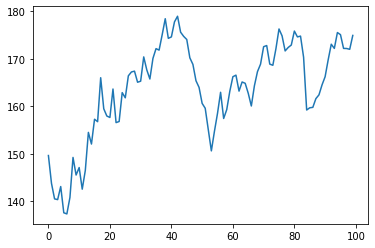

In [ ]:
plt.plot(actual)

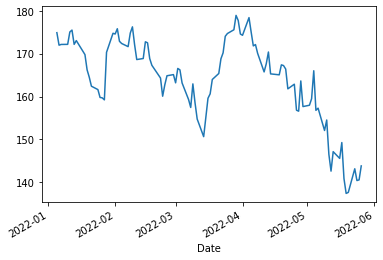

In [ ]:
data.Close[-100:-1].plot()

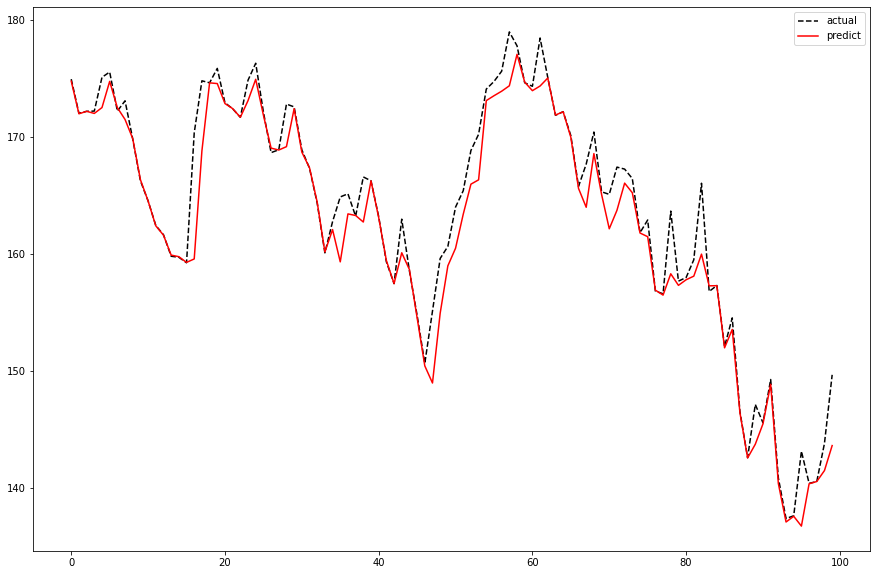

In [ ]:
import matplotlib.pyplot as plt
actual.reverse()
predictions.reverse()

plt.figure(figsize = (15,10))
plt.plot(actual , 'k--' , label = 'actual')
plt.plot(predictions , 'r', label = 'predict')
plt.legend()

In [ ]:
result = pd.concat(signal)
result.sort_index(inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-01-05 to 2022-05-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_true  100 non-null    float64
 1   y_pred  100 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 2.0 KB


In [ ]:
result['True_Returns'] = result.y_true.pct_change()
result['Pred_Returns'] = result.y_pred.pct_change()
result.dropna(inplace = True)

result['Actual_Dir'] = np.sign(result.True_Returns).astype(int)
result['Pred_Dir'] = np.sign(result.Pred_Returns).astype(int)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(result.Actual_Dir , result.Pred_Dir))

              precision    recall  f1-score   support

          -1       0.81      0.85      0.83        52
           1       0.82      0.79      0.80        47

    accuracy                           0.82        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.82      0.82      0.82        99



#BackTest

In [ ]:
OHLCV = ['Open', 'High', 'Low', 'Close', 'Volume']
ohlcv = ['open', 'high', 'low', 'close', 'volume']
df = pd.concat([ result.Pred_Dir , data[OHLCV]  , data.Returns] , 1 , join = 'inner')
df.rename(columns={'Pred_Dir':'predicted'} , inplace = True)
df.sort_index(inplace = True)

In [ ]:
import datetime
import pyfolio as pf
import backtrader as bt
from backtrader.feeds import PandasData
import warnings
from time import time

In [ ]:
ohlcv = ['open', 'high', 'low', 'close', 'volume']

df.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace=True)
# class to define the columns we will provide
class SignalData(PandasData):
    """
    Define pandas DataFrame structure
    """
    cols = OHLCV + ['predicted']
# create lines
    lines = tuple(cols)
# define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

# define backtesting strategy class
class MLStrategy(bt.Strategy):
    params = dict(
    )
    
    def __init__(self):
        # keep track of open, close prices and predicted value in the series
        self.data_predicted = self.datas[0].predicted
        self.data_open = self.datas[0].open
        self.data_close = self.datas[0].close
        
        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None


    # logging function
    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')
        # set no pending order
        self.order = None
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
    # We have set cheat_on_open = True.This means that we calculated the signals on day t's close price, 
    # but calculated the number of shares we wanted to buy based on day t+1's open price.
    def next_open(self):
        if not self.position:
            if self.data_predicted > 0:
                # calculate the max number of shares ('all-in')
                size_before_comm = int(self.broker.getcash() / self.datas[0].open)
                if self.broker.getcash() - size_before_comm * 0.001*self.datas[0].open < 0 :
                  size  = size_before_comm
                else:
                  size = int(size_before_comm - size_before_comm *0.001)
                # buy order
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]:.2f}, Close: {self.data_close[0]:.2f}')
                self.buy(size=size)
        else:
            if self.data_predicted < 0:
                # sell order
                self.log(f'SELL CREATED --- Size: {self.position.size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]:.2f}, Close: {self.data_close[0]:.2f}')
                self.sell(size=self.position.size)

In [ ]:
# instantiate SignalData class
data_bt = SignalData(dataname=df)
cerebro = bt.Cerebro(stdstats = True , cheat_on_open = True)
cerebro.addstrategy(MLStrategy)
cerebro.adddata(data_bt)
cerebro.broker.setcash(100000000.00)
cerebro.broker.setcommission(commission=0.001)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
# run the backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 100000000.00
2022-01-07, BUY CREATED --- Size: 577823, Cash: 100000000.00, Open: 172.89, Close: 172.17
2022-01-07, BUY EXECUTED --- Price: 172.89, Cost: 99899818.12,Commission: 99899.82
2022-01-10, SELL CREATED --- Size: 577823, Cash: 282.06, Open: 169.08, Close: 172.19
2022-01-10, SELL EXECUTED --- Price: 169.08, Cost: 99899818.12,Commission: 97698.31
2022-01-10, OPERATION RESULT --- Gross: -2201504.22, Net: -2399102.35
2022-01-11, BUY CREATED --- Size: 565826, Cash: 97600897.65, Open: 172.32, Close: 175.08
2022-01-11, BUY EXECUTED --- Price: 172.32, Cost: 97503140.46,Commission: 97503.14
2022-01-13, SELL CREATED --- Size: 565826, Cash: 254.04, Open: 175.78, Close: 172.19
2022-01-13, SELL EXECUTED --- Price: 175.78, Cost: 97503140.46,Commission: 99460.89
2022-01-13, OPERATION RESULT --- Gross: 1957753.13, Net: 1760789.09
2022-01-28, BUY CREATED --- Size: 599011, Cash: 99361686.74, Open: 165.71, Close: 170.33
2022-01-28, BUY EXECUTED --- Price: 165.71, Cost: 9

<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

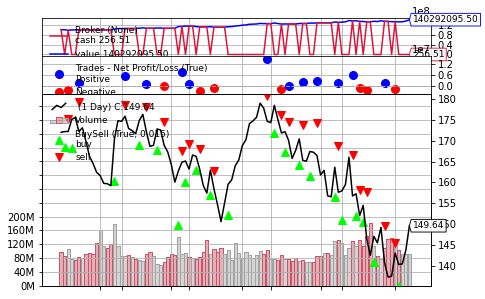

In [ ]:
cerebro.plot(iplot=False, width=25, height=15)

In [ ]:
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)
# get benchmark returns
benchmark_rets= data['Returns']
benchmark_rets.index = benchmark_rets.index.tz_localize('UTC') 
benchmark_rets = benchmark_rets.filter(returns.index)
benchmark_rets.name = 'Nifty-50'
benchmark_rets.head(2)
# get performance statistics for strategy
pf.show_perf_stats(returns)

Start date,2022-01-06
End date,2022-05-27
Total months,4
,Backtest
Annual return,136.7%
Cumulative returns,40.3%
Annual volatility,21.3%
Sharpe ratio,4.16
Calmar ratio,34.65
Stability,0.96
Max drawdown,-3.9%


In [ ]:
pf.create_full_tear_sheet(returns)

Start date,2022-01-06
End date,2022-05-27
Total months,4
,Backtest
Annual return,136.7%
Cumulative returns,40.3%
Annual volatility,21.3%
Sharpe ratio,4.16
Calmar ratio,34.65
Stability,0.96
Max drawdown,-3.9%


AttributeError: ignored